## Objective:
<b >The main objective of this project is to design and implement a robust data
preprocessing system that addresses common challenges such as missing values,
outliers, inconsistent formatting, and noise. By performing effective data preprocessing,
the project aims to enhance the quality, reliability, and usefulness of the data for
machine learning.</b>

<b style="color:red">1> Importing dataset->
    automobile.csv </b>

In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt
%matplotlib inline


In [3]:
#importing dataset
df=pd.read_csv('automobile_data.csv')
df2=df.copy()

In [4]:
df.shape

(61, 10)

In [5]:
df.head()

,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
0,0,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,13495.0
1,1,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,16500.0
2,2,alfa-romero,hatchback,94.5,171.2,ohcv,six,154,19,16500.0
3,3,audi,sedan,99.8,176.6,ohc,four,102,24,13950.0
4,4,audi,sedan,99.4,176.6,ohc,five,115,18,17450.0


In [6]:
df.tail()
df.describe()

,index,wheel-base,length,horsepower,average-mileage,price
count,61.000000,61.000000,61.000000,61.000000,61.000000,58.000000
mean,40.885246,98.481967,173.098361,107.852459,25.803279,15387.000000
std,25.429706,6.679234,14.021846,53.524398,8.129821,11320.259841
min,0.000000,88.400000,141.100000,48.000000,13.000000,5151.000000
25%,18.000000,94.500000,159.100000,68.000000,19.000000,6808.500000
50%,39.000000,96.300000,171.200000,100.000000,25.000000,11095.000000
75%,61.000000,101.200000,177.300000,123.000000,31.000000,18120.500000
max,88.000000,120.900000,208.100000,288.000000,47.000000,45400.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             61 non-null     int64  
 1   company           61 non-null     object 
 2   body-style        61 non-null     object 
 3   wheel-base        61 non-null     float64
 4   length            61 non-null     float64
 5   engine-type       61 non-null     object 
 6   num-of-cylinders  61 non-null     object 
 7   horsepower        61 non-null     int64  
 8   average-mileage   61 non-null     int64  
 9   price             58 non-null     float64
dtypes: float64(3), int64(3), object(4)
memory usage: 4.9+ KB



<font size="5"><b style="color:green">Exploring Dataset</b></font>

In [8]:
df.duplicated().sum()
#finding duplicates

np.int64(0)

In [9]:
df.drop('index',axis=1,inplace=True)


In [10]:
#Finding null Values->
df.isna().sum()

company             0
body-style          0
wheel-base          0
length              0
engine-type         0
num-of-cylinders    0
horsepower          0
average-mileage     0
price               3
dtype: int64

In [11]:
df[df['price'].isnull()]

,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
22,isuzu,sedan,94.5,155.9,ohc,four,70,38,NaN
23,isuzu,sedan,94.5,155.9,ohc,four,70,38,NaN
47,porsche,hatchback,98.4,175.7,dohcv,eight,288,17,NaN


<Axes: >

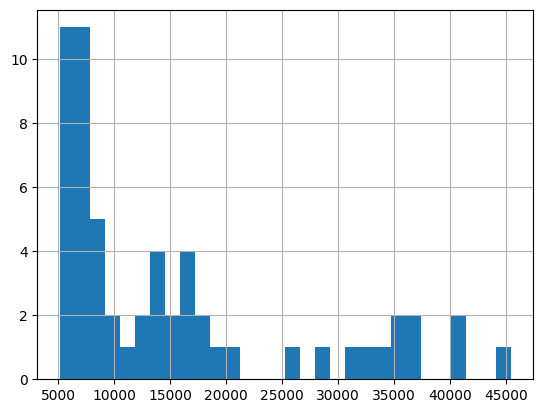

In [12]:
df['price'].hist(bins=30) #we check for data skewness if skewed use median for na and for normal dist values use mean

In [13]:
df['price'].skew() #>0 right skewed

np.float64(1.2319336876831786)

In [14]:
df.loc[[22, 23, 47], "price"] = pd.NA # use this if u wronged to object always use median() not median


In [15]:
df['price']=df['price'].fillna(df['price'].median())

In [16]:
df['price'].loc[[22, 23, 47]]


22    11095.0
23    11095.0
47    11095.0
Name: price, dtype: float64

In [17]:
df['price'].dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company           61 non-null     object 
 1   body-style        61 non-null     object 
 2   wheel-base        61 non-null     float64
 3   length            61 non-null     float64
 4   engine-type       61 non-null     object 
 5   num-of-cylinders  61 non-null     object 
 6   horsepower        61 non-null     int64  
 7   average-mileage   61 non-null     int64  
 8   price             61 non-null     float64
dtypes: float64(3), int64(2), object(4)
memory usage: 4.4+ KB


<b style="color:white">Uniqueness see columns</b> 

In [18]:
unique=df.nunique()
unique

company             16
body-style           5
wheel-base          27
length              36
engine-type          7
num-of-cylinders     7
horsepower          30
average-mileage     21
price               58
dtype: int64

In [19]:
df['company'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mitsubishi',
       'nissan', 'porsche', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [20]:
df['body-style'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [21]:
df['wheel-base'].unique()

array([ 88.6,  94.5,  99.8,  99.4, 105.8, 101.2, 103.5, 110. ,  88.4,
        93.7,  96.5,  94.3, 113. , 102. ,  93.1,  95.3, 104.9, 120.9,
       112. ,  96.3, 100.4,  89.5,  98.4,  95.7, 104.5,  97.3, 104.3])

In [22]:
df['engine-type'].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [23]:
df['num-of-cylinders'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [24]:
mapping = {
    'four': 4, 'six': 6, 'five': 5,
    'three': 3, 'twelve': 12,
    'two': 2, 'eight': 8
}
df['num-of-cylinders'] = df['num-of-cylinders'].map(mapping)


In [25]:
df

,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
0,alfa-romero,convertible,88.6,168.8,dohc,4,111,21,13495.0
1,alfa-romero,convertible,88.6,168.8,dohc,4,111,21,16500.0
2,alfa-romero,hatchback,94.5,171.2,ohcv,6,154,19,16500.0
3,audi,sedan,99.8,176.6,ohc,4,102,24,13950.0
4,audi,sedan,99.4,176.6,ohc,5,115,18,17450.0
...,...,...,...,...,...,...,...,...,...
56,volkswagen,sedan,97.3,171.7,ohc,4,85,27,7975.0
57,volkswagen,sedan,97.3,171.7,ohc,4,52,37,7995.0
58,volkswagen,sedan,97.3,171.7,ohc,4,100,26,9995.0
59,volvo,sedan,104.3,188.8,ohc,4,114,23,12940.0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company           61 non-null     object 
 1   body-style        61 non-null     object 
 2   wheel-base        61 non-null     float64
 3   length            61 non-null     float64
 4   engine-type       61 non-null     object 
 5   num-of-cylinders  61 non-null     int64  
 6   horsepower        61 non-null     int64  
 7   average-mileage   61 non-null     int64  
 8   price             61 non-null     float64
dtypes: float64(3), int64(3), object(3)
memory usage: 4.4+ KB


<font size="5"><b style="color=green">Outlier Detection</b></font>

In [27]:
df.describe()

,wheel-base,length,num-of-cylinders,horsepower,average-mileage,price
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,98.481967,173.098361,4.721311,107.852459,25.803279,15175.918033
std,6.679234,14.021846,1.495896,53.524398,8.129821,11073.239532
min,88.400000,141.100000,2.000000,48.000000,13.000000,5151.000000
25%,94.500000,159.100000,4.000000,68.000000,19.000000,6849.000000
50%,96.300000,171.200000,4.000000,100.000000,25.000000,11095.000000
75%,101.200000,177.300000,5.000000,123.000000,31.000000,17450.000000
max,120.900000,208.100000,12.000000,288.000000,47.000000,45400.000000


<Axes: >

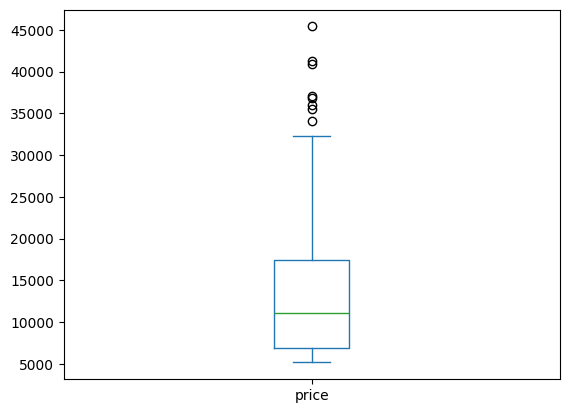

In [28]:
df["price"].plot(kind="box")

In [29]:
Q1=df['wheel-base'].quantile(0.25)
Q3=df['wheel-base'].quantile(0.75)
IQR=Q3-Q1
l_b=Q1-1.5*IQR
u_b=Q3+1.5*IQR



In [30]:
print(l_b,u_b)

84.44999999999999 111.25


In [31]:
outliers = df[(df["wheel-base"] < l_b) | (df["wheel-base"] > u_b)]
outliers
# 4outliers so lets use CAP and limit down

,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
24,jaguar,sedan,113.0,199.6,dohc,6,176,15,32250.0
25,jaguar,sedan,113.0,199.6,dohc,6,176,15,35550.0
34,mercedes-benz,sedan,120.9,208.1,ohcv,8,184,14,40960.0
35,mercedes-benz,hardtop,112.0,199.2,ohcv,8,184,14,45400.0


In [32]:
#CAP
df["wheel-base"] = df["wheel-base"].clip(lower=l_b, upper=u_b)


In [33]:
df.loc[[24,25,34,35],"wheel-base"]

24    111.25
25    111.25
34    111.25
35    111.25
Name: wheel-base, dtype: float64

<Axes: >

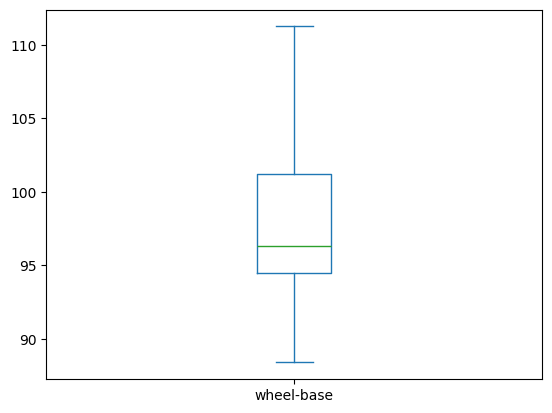

In [34]:
#similarly for all numerical columns
df["wheel-base"].plot(kind="box")

In [35]:
#Price outliers
Q1=df['price'].quantile(0.25)
Q3=df['price'].quantile(0.75)
IQR=Q3-Q1
l_b=Q1-1.5*IQR
u_b=Q3+1.5*IQR
outliers = df[(df["price"] < l_b) | (df["price"] > u_b)]
outliers


,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
11,bmw,sedan,103.50,193.8,ohc,6,182,16,41315.0
12,bmw,sedan,110.00,197.0,ohc,6,182,15,36880.0
25,jaguar,sedan,111.25,199.6,dohc,6,176,15,35550.0
26,jaguar,sedan,102.00,191.7,ohcv,12,262,13,36000.0
34,mercedes-benz,sedan,111.25,208.1,ohcv,8,184,14,40960.0
35,mercedes-benz,hardtop,111.25,199.2,ohcv,8,184,14,45400.0
45,porsche,hardtop,89.50,168.9,ohcf,6,207,17,34028.0
46,porsche,convertible,89.50,168.9,ohcf,6,207,17,37028.0


In [36]:
print(l_b,u_b)#prices

-9052.5 33351.5


In [37]:
df["price"] = df["price"].clip(lower=l_b, upper=u_b)

<b style="color:orange">Length,horsepower,average_mileage</b>

<Axes: >

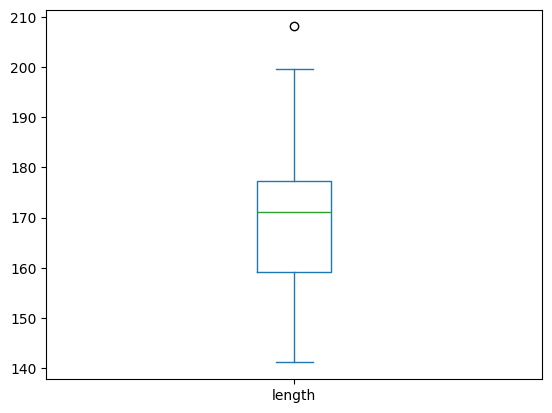

In [38]:
df["length"].plot(kind="box")

<Axes: >

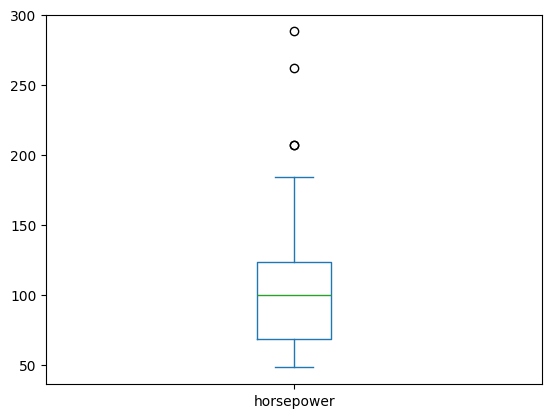

In [39]:
df["horsepower"].plot(kind="box")

<Axes: >

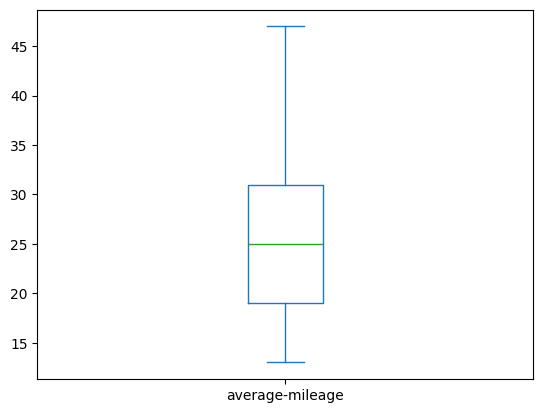

In [40]:
df["average-mileage"].plot(kind="box")

In [41]:
num_cols = ['length', 'horsepower', 'average-mileage'] 
for col in num_cols:
     Q1 = df[col].quantile(0.25)
     Q3 = df[col].quantile(0.75) 
     IQR = Q3 - Q1 
     l_b = Q1 - 1.5 * IQR 
     u_b = Q3 + 1.5 * IQR 
     df[col] = df[col].clip(lower=l_b, upper=u_b)

In [42]:
df

,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
0,alfa-romero,convertible,88.6,168.8,dohc,4,111.0,21,13495.0
1,alfa-romero,convertible,88.6,168.8,dohc,4,111.0,21,16500.0
2,alfa-romero,hatchback,94.5,171.2,ohcv,6,154.0,19,16500.0
3,audi,sedan,99.8,176.6,ohc,4,102.0,24,13950.0
4,audi,sedan,99.4,176.6,ohc,5,115.0,18,17450.0
...,...,...,...,...,...,...,...,...,...
56,volkswagen,sedan,97.3,171.7,ohc,4,85.0,27,7975.0
57,volkswagen,sedan,97.3,171.7,ohc,4,52.0,37,7995.0
58,volkswagen,sedan,97.3,171.7,ohc,4,100.0,26,9995.0
59,volvo,sedan,104.3,188.8,ohc,4,114.0,23,12940.0


<b style="color:grey">Encoding categorical Columns</b>

In [43]:
df['company'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mitsubishi',
       'nissan', 'porsche', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [44]:
df['body-style'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [45]:
df['engine-type'].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [46]:
df.info()# 3 cattegorical objects

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company           61 non-null     object 
 1   body-style        61 non-null     object 
 2   wheel-base        61 non-null     float64
 3   length            61 non-null     float64
 4   engine-type       61 non-null     object 
 5   num-of-cylinders  61 non-null     int64  
 6   horsepower        61 non-null     float64
 7   average-mileage   61 non-null     int64  
 8   price             61 non-null     float64
dtypes: float64(4), int64(2), object(3)
memory usage: 4.4+ KB


In [47]:
#using one-hot-encoder
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()


In [48]:
df_array=ohe.fit_transform(df[['company','body-style','engine-type']]).toarray()
df_array

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(61, 28))

In [49]:
ohe.categories_

[array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
        'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mitsubishi',
        'nissan', 'porsche', 'toyota', 'volkswagen', 'volvo'], dtype=object),
 array(['convertible', 'hardtop', 'hatchback', 'sedan', 'wagon'],
       dtype=object),
 array(['dohc', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor'], dtype=object)]

In [50]:
categories=[['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
        'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mitsubishi',
        'nissan', 'porsche', 'toyota', 'volkswagen', 'volvo'], ['convertible', 'hardtop', 'hatchback', 'sedan', 'wagon'],['dohc', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor']]
singled_list=[]
for i in categories:
    for x in i:
        singled_list.append(x)
singled_list

['alfa-romero',
 'audi',
 'bmw',
 'chevrolet',
 'dodge',
 'honda',
 'isuzu',
 'jaguar',
 'mazda',
 'mercedes-benz',
 'mitsubishi',
 'nissan',
 'porsche',
 'toyota',
 'volkswagen',
 'volvo',
 'convertible',
 'hardtop',
 'hatchback',
 'sedan',
 'wagon',
 'dohc',
 'dohcv',
 'l',
 'ohc',
 'ohcf',
 'ohcv',
 'rotor']

In [51]:
#Create a new_df with these cols with array values and then concat
df_new=pd.DataFrame(df_array,columns=singled_list)
df_new

,alfa-romero,audi,bmw,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercedes-benz,...,hatchback,sedan,wagon,dohc,dohcv,l,ohc,ohcf,ohcv,rotor
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [52]:
df_ml=pd.concat([df,df_new],axis=1)
df_ml

,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price,alfa-romero,...,hatchback,sedan,wagon,dohc,dohcv,l,ohc,ohcf,ohcv,rotor
0,alfa-romero,convertible,88.6,168.8,dohc,4,111.0,21,13495.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,alfa-romero,convertible,88.6,168.8,dohc,4,111.0,21,16500.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,alfa-romero,hatchback,94.5,171.2,ohcv,6,154.0,19,16500.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,audi,sedan,99.8,176.6,ohc,4,102.0,24,13950.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,audi,sedan,99.4,176.6,ohc,5,115.0,18,17450.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,volkswagen,sedan,97.3,171.7,ohc,4,85.0,27,7975.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
57,volkswagen,sedan,97.3,171.7,ohc,4,52.0,37,7995.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
58,volkswagen,sedan,97.3,171.7,ohc,4,100.0,26,9995.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
59,volvo,sedan,104.3,188.8,ohc,4,114.0,23,12940.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [53]:
df_ml.drop(columns=['body-style','company','engine-type'],axis=1,inplace=True)


In [54]:
df_ml

,wheel-base,length,num-of-cylinders,horsepower,average-mileage,price,alfa-romero,audi,bmw,chevrolet,...,hatchback,sedan,wagon,dohc,dohcv,l,ohc,ohcf,ohcv,rotor
0,88.6,168.8,4,111.0,21,13495.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,88.6,168.8,4,111.0,21,16500.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,94.5,171.2,6,154.0,19,16500.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,99.8,176.6,4,102.0,24,13950.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,99.4,176.6,5,115.0,18,17450.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,97.3,171.7,4,85.0,27,7975.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
57,97.3,171.7,4,52.0,37,7995.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
58,97.3,171.7,4,100.0,26,9995.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
59,104.3,188.8,4,114.0,23,12940.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [55]:
df_ml.to_csv("automobile_cleaned.csv", index=False)


<b style="color:pink">Completed</b>